In [1]:
import numpy as np 
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of binary classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.
</div>


<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    To download the data, we will use !wget to download it from IBM Object Storage.
</div>

now, read data using pandas dataframe:

In [2]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
my_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
my_data['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>

Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>

Remove the column containing the target name since it doesn't contain numeric values.

As you may figure out, some features in this dataset are categorical such as __Sex__ or __BP__. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. __pandas.get_dummies()__
Convert categorical variable into dummy/indicator variables.

In [5]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
my_data.iloc[:,1] = le_sex.transform(my_data.iloc[:,1]) 
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,drugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,0,LOW,HIGH,11.567,drugC
196,16,1,LOW,HIGH,12.006,drugC
197,52,1,NORMAL,HIGH,9.894,drugX
198,23,1,NORMAL,NORMAL,14.020,drugX


In [6]:
my_data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [7]:
my_data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [8]:
cond_bp = {'HIGH':2, 'LOW':0,'NORMAL':1}
my_data['BP'] = my_data['BP'].replace(cond_bp)
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,HIGH,25.355,drugY
1,47,1,0,HIGH,13.093,drugC
2,47,1,0,HIGH,10.114,drugC
3,28,0,1,HIGH,7.798,drugX
4,61,0,0,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,0,0,HIGH,11.567,drugC
196,16,1,0,HIGH,12.006,drugC
197,52,1,1,HIGH,9.894,drugX
198,23,1,1,NORMAL,14.020,drugX


In [9]:
cond_ch = {'HIGH':1,'NORMAL':0}
my_data['Cholesterol'] = my_data['Cholesterol'].replace(cond_ch)
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,drugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,drugY
...,...,...,...,...,...,...
195,56,0,0,1,11.567,drugC
196,16,1,0,1,12.006,drugC
197,52,1,1,1,9.894,drugX
198,23,1,1,0,14.020,drugX


Now we can fill the target variable.

In [10]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

### we're encoding the "Label" with "LabelEncoder"

In [13]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X

array([[23.   ,  0.   ,  2.   ,  1.   , 25.355],
       [47.   ,  1.   ,  0.   ,  1.   , 13.093],
       [47.   ,  1.   ,  0.   ,  1.   , 10.114],
       [28.   ,  0.   ,  1.   ,  1.   ,  7.798],
       [61.   ,  0.   ,  0.   ,  1.   , 18.043],
       [22.   ,  0.   ,  1.   ,  1.   ,  8.607],
       [49.   ,  0.   ,  1.   ,  1.   , 16.275],
       [41.   ,  1.   ,  0.   ,  1.   , 11.037],
       [60.   ,  1.   ,  1.   ,  1.   , 15.171],
       [43.   ,  1.   ,  0.   ,  0.   , 19.368],
       [47.   ,  0.   ,  0.   ,  1.   , 11.767],
       [34.   ,  0.   ,  2.   ,  0.   , 19.199],
       [43.   ,  1.   ,  0.   ,  1.   , 15.376],
       [74.   ,  0.   ,  0.   ,  1.   , 20.942],
       [50.   ,  0.   ,  1.   ,  1.   , 12.703],
       [16.   ,  0.   ,  2.   ,  0.   , 15.516],
       [69.   ,  1.   ,  0.   ,  0.   , 11.455],
       [43.   ,  1.   ,  2.   ,  1.   , 13.972],
       [23.   ,  1.   ,  0.   ,  1.   ,  7.298],
       [32.   ,  0.   ,  2.   ,  0.   , 25.974],
       [57.   ,  1. 

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

In [14]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_train, X_test, y_train, y_test <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match

In [17]:
print(X_train.shape)
print(y_train.shape)

(140, 5)
(140,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match

In [18]:
print(X_test.shape)
print(y_test.shape)

(60, 5)
(60,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [19]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 15)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=15)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [20]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [21]:
predTree = drugTree.predict(X_test)

You can print out <b>predTree</b> and <b>y_test</b> if you want to visually compare the prediction to the actual values.

In [22]:
print (predTree [0:5])
print (y_test [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [23]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


# Practice 

## Show and try to explain confusion matrix

## Calculate F1 score, Precision and Recall

DecisionTrees 's Confusion Matrix: [[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 20  1]
 [ 0  0  0  0 22]]


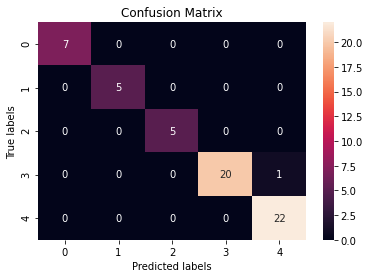

In [24]:
cm =  metrics.confusion_matrix(y_test, predTree)
print("DecisionTrees 's Confusion Matrix:", metrics.confusion_matrix(y_test, predTree))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

In [25]:
print("DecisionTrees 's F1 score:",metrics.f1_score(y_test, predTree, average='macro'))
print("DecisionTrees 's F1 score:",metrics.f1_score(y_test, predTree, average='micro'))
print("DecisionTrees 's F1 score:",metrics.f1_score(y_test, predTree, average='weighted'))
print("DecisionTrees 's F1 score:",metrics.f1_score(y_test, predTree, average=None))

DecisionTrees 's F1 score: 0.9906775067750677
DecisionTrees 's F1 score: 0.9833333333333333
DecisionTrees 's F1 score: 0.9833152664859981
DecisionTrees 's F1 score: [1.         1.         1.         0.97560976 0.97777778]


In [26]:
print("DecisionTrees 's Precision:",metrics.precision_score(y_test, predTree, average='macro'))
print("DecisionTrees 's Precision:",metrics.precision_score(y_test, predTree, average='micro'))
print("DecisionTrees 's Precision:",metrics.precision_score(y_test, predTree, average='micro'))
print("DecisionTrees 's F1 score:",metrics.precision_score(y_test, predTree, average=None))

DecisionTrees 's Precision: 0.9913043478260869
DecisionTrees 's Precision: 0.9833333333333333
DecisionTrees 's Precision: 0.9833333333333333
DecisionTrees 's F1 score: [1.         1.         1.         1.         0.95652174]


In [27]:
# print("DecisionTrees 's Recall:",metrics.recall_score(y_test, predTree, average='macro'))
# print("DecisionTrees 's Reacll:",metrics.recall_score(y_test, predTree, average='micro'))
# print("DecisionTrees 's Reacll:",metrics.recall_score(y_test, predTree, average='weighted'))
from sklearn.metrics import classification_report 
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



## SVM

In [33]:
svm_model = svm.SVC(kernel = "linear")
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [34]:
predS = svm_model.predict(X_test)

In [35]:
print("SVM 's Accuracy:", metrics.accuracy_score(y_test,predS))

SVM 's Accuracy: 0.95


In [36]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training s
clf.fit(X_train,y_train)

#Predict the response for test data
y_pred = clf.predict(X_test)

In [37]:
print("SVM 's Accuracy:", metrics.accuracy_score(y_test,y_pred))

SVM 's Accuracy: 0.95


## KNN

In [55]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_predi = knn.predict(X_test)

In [56]:
print("KNeighborsNearest's Accuracy:", metrics.accuracy_score(y_test,y_predi))

KNeighborsNearest's Accuracy: 0.6333333333333333


In [57]:
print("KNeighborsNearest's F1 score:",metrics.f1_score(y_test, y_predi, average='macro'))
print("KNeighborsNearest's F1 score:",metrics.f1_score(y_test, y_predi, average='micro'))
print("KNeighborsNearest's F1 score:",metrics.f1_score(y_test, y_predi, average='weighted'))
print("KNeighborsNearest's F1 score:",metrics.f1_score(y_test, y_predi, average=None))

KNeighborsNearest's F1 score: 0.5319703951962016
KNeighborsNearest's F1 score: 0.6333333333333333
KNeighborsNearest's F1 score: 0.6469077875529489
KNeighborsNearest's F1 score: [0.53333333 0.47619048 0.18181818 0.51612903 0.95238095]


## Random Forest

In [41]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_predict = rfc.predict(X_test)

In [42]:
print("Random Forest's Accuracy:", metrics.accuracy_score(y_test,y_predict))

Random Forest's Accuracy: 0.9833333333333333


In [54]:
print("Random Forest's F1 score:",metrics.f1_score(y_test, y_predict, average='macro'))
print("Random Forest's F1 score:",metrics.f1_score(y_test, y_predict, average='micro'))
print("Random Forest's F1 score:",metrics.f1_score(y_test, y_predict, average='weighted'))
print("Random Forest's F1 score:",metrics.f1_score(y_test, y_predict, average=None))

Random Forest's F1 score: 0.9906775067750677
Random Forest's F1 score: 0.9833333333333333
Random Forest's F1 score: 0.9833152664859981
Random Forest's F1 score: [1.         1.         1.         0.97560976 0.97777778]


   From this case we show our best alghoritm is __Random Forest__.Now we do this alghoritm's Hyperparameters

## Hyperparameter Optimization

### Random Forest

In [58]:
rf = RandomForestClassifier(random_state = 42)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [59]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 100, 150, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [60]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=2)

In [61]:
rf_random.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [62]:
def evaluate(model, test_features):
    predictions = model.predict(test_features)
    accuracy = metrics.fbeta_score(y_test, predictions, average=None, beta=0.5).mean()
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)

base_accuracy = evaluate(base_model, X_test)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,X_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.


 :) Thus, we see that Hyperparameter Optimization does not help us at all. Random Forest works to the maximum with the initial parameters